In [3]:
%matplotlib inline
import sys
sys.path.append("../src")
from graphprobe import loadviz, summarize
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

In [4]:
 category_colors = OrderedDict([                                                
       ('scene',    '#3288bd'),                                                   
       ('object',   '#99d594'),                                                   
       ('part',     '#e6f598'),                                                   
      ('material', '#fee08b'),                                                   
      ('texture',  '#fc8d59'),                                                   
      ('color',    '#d53e4f'),                                                  
      ('total',    '#aaaaaa')])
threshold = 0.05

In [8]:
directory = "../dissection/vgg_material_full_conv/"
blobs = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

In [10]:
summarize(loadviz(directory, blobs[0]), threshold)

defaultdict(float, {})

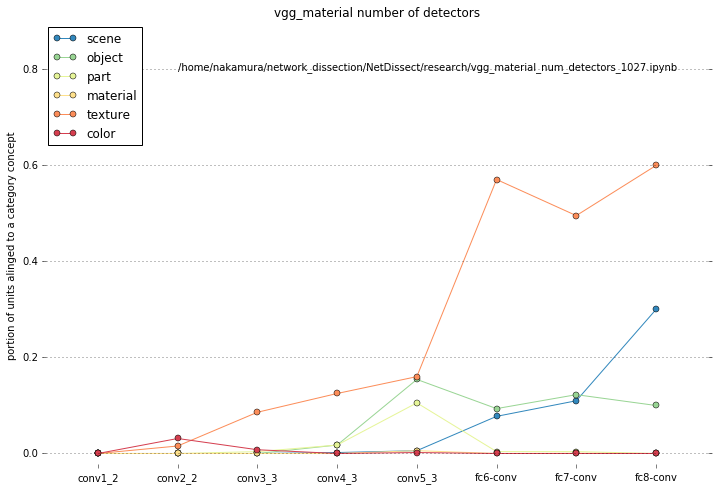

In [14]:
data = []                                            
categories = set(category_colors.keys())                               
# infer variables$                                                      
# use blob name as labels if label if not specified$                    
                                        
# save file as directories/graph.png$                                                                                                        
                                
for blob in blobs:                       
    stats = summarize(loadviz(directory, blob), threshold,
                      top_only=True) 
    data.append(stats)                                
    categories.update(stats.keys())
x = range(1, len(data) + 1)                                     
maxval = 0                                             
plt.figure(num=None, figsize=(12, 8))
for cat in category_colors.keys():                           
    if cat not in categories:                                      
        continue            
    if cat == "total":
        continue
    dat = [d[cat] for d in data]
    maxval = max(maxval, max(dat))                                     
    plt.plot(x, dat, 'o-' if cat != 'total' else 's--',
             color=category_colors[cat], label=cat)                 
                                                      
plt.xticks(x, blobs)           
                                                                               
plt.margins(0.1)                                                    
plt.legend(loc="upper left")                                                                                     
plt.ylim(-maxval * 0.05, maxval * 1.5)
ax = plt.gca()                                                        
ax.yaxis.grid(True)
for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)                         
ax.xaxis.set_ticks_position('bottom')                                  
plt.title("vgg_material number of detectors")                                           
plt.ylabel('portion of units alinged to a category concept')

file_path = '/home/nakamura/network_dissection/NetDissect/research/vgg_material_num_detectors_1027.ipynb'
plt.text(2.0,0.8,file_path)
plt.savefig(directory + "graph.pdf")
plt.show()